In [1]:
# Step 1: Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Step 2: Load and preprocess the dataset (MNIST)
# Load MNIST dataset (28x28 grayscale images)
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [-1, 1] for GAN training
X_train = (X_train.astype("float32") - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

print("Dataset shape:", X_train.shape)

Dataset shape: (60000, 28, 28, 1)


In [3]:
# Step 3: Build Generator Model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),

        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", use_bias=False, activation="tanh"),
    ])
    return model


In [4]:
# Step 4: Build Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ])
    return model

In [5]:
# Step 5: Compile Models
# Latent space dimension
latent_dim = 100

# Build models
generator = build_generator(latent_dim)
discriminator = build_discriminator()

# Compile discriminator
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=["accuracy"]
)

# Build GAN (stacked model)
discriminator.trainable = False  # Freeze discriminator in GAN training
gan_input = tf.keras.Input(shape=(latent_dim,))
fake_image = generator(gan_input)
validity = discriminator(fake_image)
gan = tf.keras.Model(gan_input, validity)

gan.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(1e-4))


4/4 [==============================] - 0s 49ms/step
100 [D loss: 0.0726, acc.: 100.00] [G loss: 0.0012]
4/4 [==============================] - 0s 40ms/step
200 [D loss: 0.0024, acc.: 100.00] [G loss: 0.0003]
4/4 [==============================] - 0s 41ms/step
300 [D loss: 0.0022, acc.: 100.00] [G loss: 0.0003]
4/4 [==============================] - 0s 41ms/step
400 [D loss: 0.0412, acc.: 100.00] [G loss: 0.0063]
4/4 [==============================] - 0s 41ms/step
500 [D loss: 0.0482, acc.: 99.61] [G loss: 0.9275]
4/4 [==============================] - 0s 42ms/step
600 [D loss: 0.3775, acc.: 88.67] [G loss: 2.2750]
4/4 [==============================] - 0s 38ms/step
700 [D loss: 0.4266, acc.: 81.64] [G loss: 2.2911]
4/4 [==============================] - 0s 36ms/step
800 [D loss: 0.4657, acc.: 78.12] [G loss: 1.3463]
4/4 [==============================] - 0s 54ms/step
900 [D loss: 0.8130, acc.: 57.81] [G loss: 1.2330]
4/4 [==============================] - 0s 71ms/step
1000 [D loss: 0.6

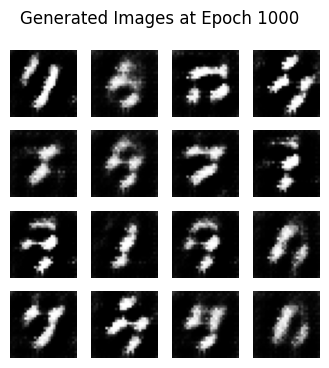

4/4 [==============================] - 0s 58ms/step
1100 [D loss: 0.6322, acc.: 65.23] [G loss: 0.8374]
4/4 [==============================] - 0s 59ms/step
1200 [D loss: 0.6891, acc.: 61.33] [G loss: 0.8937]
4/4 [==============================] - 0s 73ms/step
1300 [D loss: 0.7060, acc.: 59.38] [G loss: 0.7658]
4/4 [==============================] - 0s 54ms/step
1400 [D loss: 0.5224, acc.: 71.88] [G loss: 0.7049]
4/4 [==============================] - 0s 54ms/step
1500 [D loss: 0.8926, acc.: 42.97] [G loss: 0.8699]
4/4 [==============================] - 0s 59ms/step
1600 [D loss: 0.7243, acc.: 55.47] [G loss: 0.8815]
4/4 [==============================] - 0s 63ms/step
1700 [D loss: 0.5942, acc.: 73.05] [G loss: 1.0996]
4/4 [==============================] - 0s 70ms/step
1800 [D loss: 0.7841, acc.: 44.14] [G loss: 0.7867]
4/4 [==============================] - 0s 48ms/step
1900 [D loss: 0.8324, acc.: 43.36] [G loss: 1.1395]
4/4 [==============================] - 0s 60ms/step
2000 [D loss

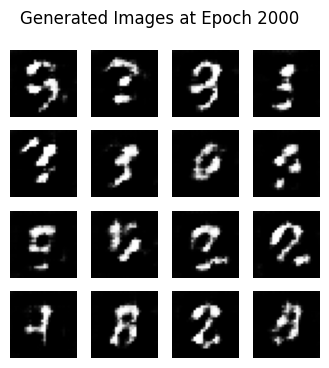

4/4 [==============================] - 0s 60ms/step
2100 [D loss: 0.7809, acc.: 52.73] [G loss: 0.8334]
4/4 [==============================] - 0s 58ms/step
2200 [D loss: 0.6175, acc.: 64.84] [G loss: 0.9013]
4/4 [==============================] - 0s 68ms/step
2300 [D loss: 0.6634, acc.: 62.89] [G loss: 0.8881]
4/4 [==============================] - 0s 60ms/step
2400 [D loss: 0.6717, acc.: 60.16] [G loss: 0.7103]
4/4 [==============================] - 0s 62ms/step
2500 [D loss: 0.5958, acc.: 71.09] [G loss: 0.9156]
4/4 [==============================] - 0s 56ms/step
2600 [D loss: 0.7478, acc.: 50.00] [G loss: 0.5770]
4/4 [==============================] - 0s 60ms/step
2700 [D loss: 0.7072, acc.: 57.42] [G loss: 0.8725]
4/4 [==============================] - 0s 56ms/step
2800 [D loss: 0.7107, acc.: 53.52] [G loss: 0.8554]
4/4 [==============================] - 0s 59ms/step
2900 [D loss: 0.7239, acc.: 52.34] [G loss: 0.9457]
4/4 [==============================] - 0s 55ms/step
3000 [D loss

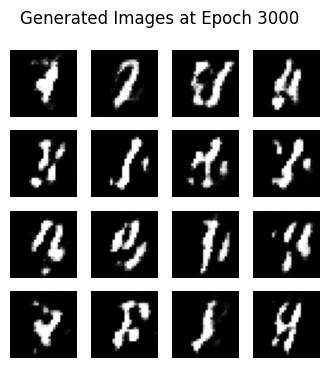

4/4 [==============================] - 0s 56ms/step
3100 [D loss: 0.6590, acc.: 59.77] [G loss: 0.7477]
4/4 [==============================] - 0s 51ms/step
3200 [D loss: 0.7775, acc.: 43.75] [G loss: 0.8334]
4/4 [==============================] - 0s 55ms/step
3300 [D loss: 0.5882, acc.: 70.70] [G loss: 0.8034]
4/4 [==============================] - 0s 54ms/step
3400 [D loss: 0.7926, acc.: 39.45] [G loss: 0.8145]
4/4 [==============================] - 0s 55ms/step
3500 [D loss: 0.7272, acc.: 57.03] [G loss: 0.8819]
4/4 [==============================] - 0s 53ms/step
3600 [D loss: 0.6565, acc.: 60.16] [G loss: 0.7924]
4/4 [==============================] - 0s 57ms/step
3700 [D loss: 0.7094, acc.: 53.12] [G loss: 0.8225]
4/4 [==============================] - 0s 53ms/step
3800 [D loss: 0.6946, acc.: 57.42] [G loss: 0.8330]
4/4 [==============================] - 0s 54ms/step
3900 [D loss: 0.6394, acc.: 62.50] [G loss: 0.7261]
4/4 [==============================] - 0s 55ms/step
4000 [D loss

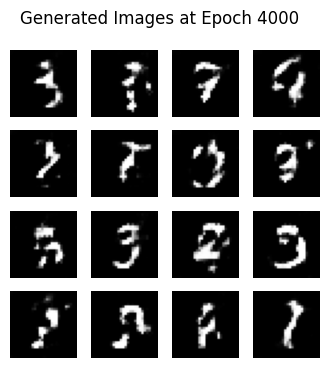

4/4 [==============================] - 0s 54ms/step
4100 [D loss: 0.5584, acc.: 70.31] [G loss: 0.7987]
4/4 [==============================] - 0s 54ms/step
4200 [D loss: 0.5771, acc.: 76.95] [G loss: 0.9397]
4/4 [==============================] - 0s 53ms/step
4300 [D loss: 0.7712, acc.: 50.39] [G loss: 0.8635]
4/4 [==============================] - 0s 55ms/step
4400 [D loss: 0.5776, acc.: 69.53] [G loss: 0.9249]
4/4 [==============================] - 0s 55ms/step
4500 [D loss: 0.5731, acc.: 69.92] [G loss: 0.8492]
4/4 [==============================] - 0s 59ms/step
4600 [D loss: 0.6778, acc.: 57.42] [G loss: 0.7391]
4/4 [==============================] - 0s 56ms/step
4700 [D loss: 0.6498, acc.: 62.11] [G loss: 0.8594]
4/4 [==============================] - 0s 56ms/step
4800 [D loss: 0.6006, acc.: 66.80] [G loss: 0.9030]
4/4 [==============================] - 0s 56ms/step
4900 [D loss: 0.5981, acc.: 70.70] [G loss: 0.7922]
4/4 [==============================] - 0s 56ms/step
5000 [D loss

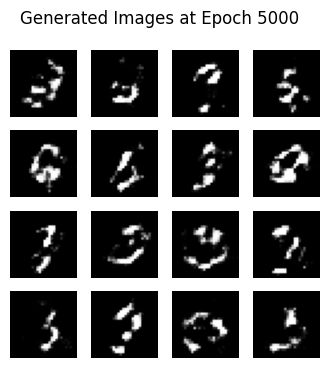

4/4 [==============================] - 0s 54ms/step
5100 [D loss: 0.7346, acc.: 58.98] [G loss: 1.0287]
4/4 [==============================] - 0s 57ms/step
5200 [D loss: 0.5494, acc.: 73.83] [G loss: 0.8969]
4/4 [==============================] - 0s 55ms/step
5300 [D loss: 0.6811, acc.: 54.30] [G loss: 0.8487]
4/4 [==============================] - 0s 59ms/step
5400 [D loss: 0.6948, acc.: 57.42] [G loss: 0.8532]
4/4 [==============================] - 0s 62ms/step
5500 [D loss: 0.5964, acc.: 68.75] [G loss: 0.9406]
4/4 [==============================] - 0s 55ms/step
5600 [D loss: 0.5959, acc.: 66.02] [G loss: 0.9178]
4/4 [==============================] - 0s 62ms/step
5700 [D loss: 0.6535, acc.: 63.67] [G loss: 1.0509]
4/4 [==============================] - 0s 60ms/step
5800 [D loss: 0.6989, acc.: 62.11] [G loss: 1.0751]
4/4 [==============================] - 0s 59ms/step
5900 [D loss: 0.4832, acc.: 78.91] [G loss: 1.0423]
4/4 [==============================] - 0s 60ms/step
6000 [D loss

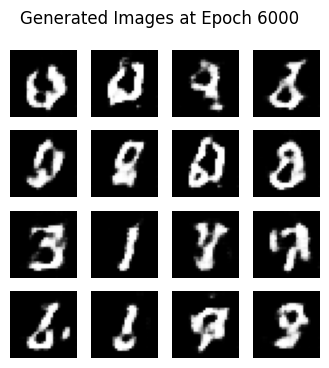

4/4 [==============================] - 0s 64ms/step
6100 [D loss: 0.6959, acc.: 57.03] [G loss: 0.7281]
4/4 [==============================] - 0s 57ms/step
6200 [D loss: 0.6354, acc.: 66.02] [G loss: 0.8975]
4/4 [==============================] - 0s 61ms/step
6300 [D loss: 0.5819, acc.: 70.70] [G loss: 0.8274]
4/4 [==============================] - 0s 63ms/step
6400 [D loss: 0.4956, acc.: 82.81] [G loss: 0.9954]
4/4 [==============================] - 0s 58ms/step
6500 [D loss: 0.5886, acc.: 69.14] [G loss: 0.9599]
4/4 [==============================] - 0s 60ms/step
6600 [D loss: 0.5323, acc.: 77.73] [G loss: 0.9821]
4/4 [==============================] - 0s 59ms/step
6700 [D loss: 0.5547, acc.: 75.39] [G loss: 0.9903]
4/4 [==============================] - 0s 60ms/step
6800 [D loss: 0.5535, acc.: 72.66] [G loss: 0.9306]
4/4 [==============================] - 0s 61ms/step
6900 [D loss: 0.5090, acc.: 77.34] [G loss: 1.0658]
4/4 [==============================] - 0s 61ms/step
7000 [D loss

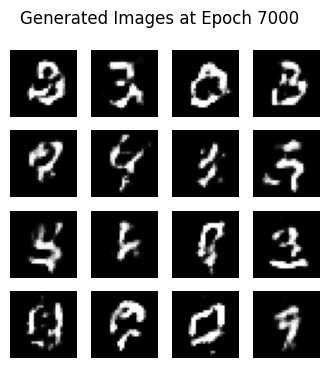

4/4 [==============================] - 0s 58ms/step
7100 [D loss: 0.6529, acc.: 61.72] [G loss: 0.9178]
4/4 [==============================] - 0s 59ms/step
7200 [D loss: 0.6150, acc.: 67.58] [G loss: 0.9018]
4/4 [==============================] - 0s 59ms/step
7300 [D loss: 0.6323, acc.: 66.41] [G loss: 0.9412]
4/4 [==============================] - 0s 61ms/step
7400 [D loss: 0.6344, acc.: 64.06] [G loss: 0.8935]
4/4 [==============================] - 0s 62ms/step
7500 [D loss: 0.6864, acc.: 55.86] [G loss: 0.8564]
4/4 [==============================] - 0s 85ms/step
7600 [D loss: 0.6082, acc.: 65.23] [G loss: 0.9854]
4/4 [==============================] - 0s 61ms/step
7700 [D loss: 0.6000, acc.: 67.58] [G loss: 0.9147]
4/4 [==============================] - 0s 63ms/step
7800 [D loss: 0.5912, acc.: 69.53] [G loss: 0.9147]
4/4 [==============================] - 0s 65ms/step
7900 [D loss: 0.5917, acc.: 72.66] [G loss: 0.9143]
4/4 [==============================] - 0s 68ms/step
8000 [D loss

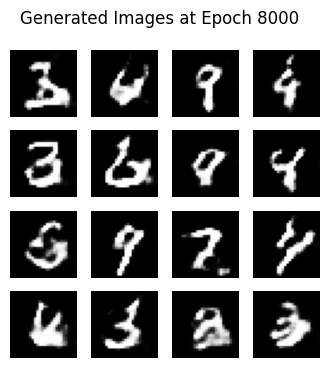

4/4 [==============================] - 0s 65ms/step
8100 [D loss: 0.5409, acc.: 76.17] [G loss: 1.0131]
4/4 [==============================] - 0s 66ms/step
8200 [D loss: 0.6224, acc.: 65.23] [G loss: 0.8010]
4/4 [==============================] - 0s 67ms/step
8300 [D loss: 0.6281, acc.: 62.89] [G loss: 0.8214]
4/4 [==============================] - 0s 67ms/step
8400 [D loss: 0.6242, acc.: 66.41] [G loss: 0.7930]
4/4 [==============================] - 0s 67ms/step
8500 [D loss: 0.6789, acc.: 60.55] [G loss: 0.9297]
4/4 [==============================] - 0s 69ms/step
8600 [D loss: 0.6004, acc.: 64.06] [G loss: 0.8347]
4/4 [==============================] - 0s 69ms/step
8700 [D loss: 0.5801, acc.: 71.48] [G loss: 1.0058]
4/4 [==============================] - 0s 70ms/step
8800 [D loss: 0.6460, acc.: 62.11] [G loss: 0.8949]
4/4 [==============================] - 0s 72ms/step
8900 [D loss: 0.7217, acc.: 52.34] [G loss: 0.7651]
4/4 [==============================] - 0s 74ms/step
9000 [D loss

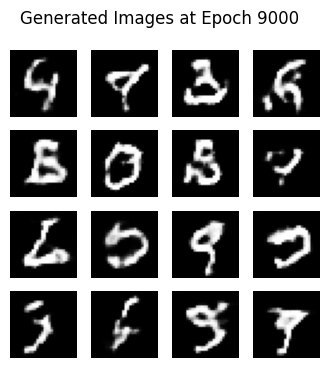

4/4 [==============================] - 0s 73ms/step
9100 [D loss: 0.6265, acc.: 62.50] [G loss: 0.9720]
4/4 [==============================] - 0s 74ms/step
9200 [D loss: 0.6115, acc.: 64.84] [G loss: 0.8959]
4/4 [==============================] - 0s 74ms/step
9300 [D loss: 0.6504, acc.: 63.67] [G loss: 0.8493]
4/4 [==============================] - 0s 74ms/step
9400 [D loss: 0.6066, acc.: 64.84] [G loss: 0.8842]
4/4 [==============================] - 0s 75ms/step
9500 [D loss: 0.5875, acc.: 68.36] [G loss: 0.9017]
4/4 [==============================] - 0s 74ms/step
9600 [D loss: 0.6266, acc.: 64.84] [G loss: 0.8428]
4/4 [==============================] - 0s 78ms/step
9700 [D loss: 0.6731, acc.: 58.98] [G loss: 0.7830]
4/4 [==============================] - 0s 76ms/step
9800 [D loss: 0.6896, acc.: 56.25] [G loss: 0.9481]
4/4 [==============================] - 0s 78ms/step
9900 [D loss: 0.5363, acc.: 75.00] [G loss: 1.0045]
4/4 [==============================] - 0s 78ms/step
10000 [D los

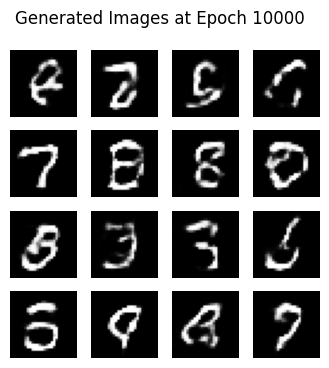

In [6]:
# Step 6: Train GAN
# Training parameters
epochs = 10000
batch_size = 128
sample_interval = 1000

# Labels for real and fake images
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

# Function to save generated images
def save_generated_images(epoch):
    noise = np.random.normal(0, 1, (16, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(4, 4, figsize=(4, 4))
    count = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[count, :, :, 0], cmap="gray")
            axs[i, j].axis("off")
            count += 1
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# Training loop
for epoch in range(1, epochs + 1):

    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, real_label)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_label)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_label)

    # Print progress
    if epoch % 100 == 0:
        print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}] [G loss: {g_loss:.4f}]")

    # Save generated images
    if epoch % sample_interval == 0:
        save_generated_images(epoch)

1/1 [==============================] - 0s 45ms/step
Generated images shape: (10, 28, 28, 1)


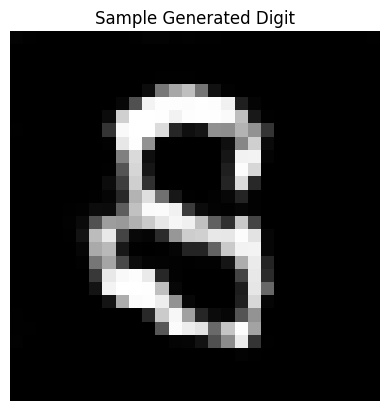

In [7]:
# Step 7: Evaluate GAN
# Generate some test images
test_noise = np.random.normal(0, 1, (10, latent_dim))
generated_images = generator.predict(test_noise)

print("Generated images shape:", generated_images.shape)

# Show one generated image
plt.imshow(generated_images[0, :, :, 0], cmap="gray")
plt.title("Sample Generated Digit")
plt.axis("off")
plt.show()